<a href="https://colab.research.google.com/github/dianachavezr/Challenge_TELECOM_X_Alura/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [109]:
import pandas as pd

# URL del archivo JSON (asegúrate de usar la URL "raw" de GitHub)
url = "https://raw.githubusercontent.com/dianachavezr/Challenge_TELECOM_X_Alura/main/TelecomX_Data.json"

# Cargar el archivo JSON
df = pd.read_json(url)

# Visualizar las primeras filas del DataFrame para asegurar que se cargaron correctamente
df_normalized.head()



,ID_cliente,Evasión,Género_cliente,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antigüedad_cliente,Servicio_telefono,Tiene_lineas_multiples,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,factura_electrónica,Metodo_pago,Facturacion_mensual,Facturacion_total,Facturacion_diaria
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [110]:
from pandas import json_normalize

# Desanidar el JSON completo
df_normalized = json_normalize(df_normalized.to_dict(orient='records'), sep='_')

# Mostrar las primeras filas del DataFrame normalizado
df_normalized.head()


,ID_cliente,Evasión,Género_cliente,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antigüedad_cliente,Servicio_telefono,Tiene_lineas_multiples,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,factura_electrónica,Metodo_pago,Facturacion_mensual,Facturacion_total,Facturacion_diaria
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#🔧 Transformación

Verificar valores nulos:
python
Copiar
Editar


In [4]:
# Verificar si hay valores nulos
df_normalized.isnull().sum()


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


Eliminar valores duplicados:

In [5]:
# Verificar duplicados
df_normalized.duplicated().sum()

# Eliminar duplicados si es necesario
df_normalized = df_normalized.drop_duplicates()


In [6]:
# Convertir columnas numéricas
df_normalized['account_Charges_Monthly'] = pd.to_numeric(df_normalized['account_Charges_Monthly'], errors='coerce')
df_normalized['account_Charges_Total'] = pd.to_numeric(df_normalized['account_Charges_Total'], errors='coerce')


In [7]:
# Guardar el DataFrame normalizado como CSV
df_normalized.to_csv('telecom_data_normalized.csv', index=False)


In [8]:
# Guardar el DataFrame como archivo CSV
df_normalized.to_csv('/content/telecom_data_normalized.csv', index=False)


In [9]:
from google.colab import files

# Descargar el archivo CSV
files.download('/content/telecom_data_normalized.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Ver columnas y tipos de datos
df_normalized.info()

# Ver columnas únicas de ejemplo
df_normalized.columns

# Estadísticas básicas
df_normalized.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


Valores nulos

In [20]:
# 1. Filtrar la fila que quieres mantener (con customerID = "9995-HOTOH")
row_to_keep = df_normalized[df_normalized['customerID'] == '9995-HOTOH']

# 2. Eliminar las filas con valores nulos en la columna 'account_Charges_Total'
df_normalized.dropna(subset=['account_Charges_Total'], inplace=True)

# 3. Reinsertar la fila que quieres mantener (si fue eliminada)
df_normalized = pd.concat([df_normalized, row_to_keep])

# 4. Verificar que la fila se mantuvo
df_normalized[df_normalized['customerID'] == '9995-HOTOH']



,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.0,3707.6
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.0,3707.6


In [27]:
# Asumimos que hay una columna llamada "Facturación mensual"
df_normalized["Account_Charges_Daily"] = df_normalized["account_Charges_Monthly"] / 30
df_normalized["Account_Charges_Daily"].head()

,Account_Charges_Daily
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


In [29]:
# Convertir 'Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling' a binarios: 1 para 'Yes' y 0 para 'No'
df_normalized['Churn'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})
df_normalized['customer_Partner'] = df_normalized['customer_Partner'].map({'Yes': 1, 'No': 0})
df_normalized['customer_Dependents'] = df_normalized['customer_Dependents'].map({'Yes': 1, 'No': 0})
df_normalized['phone_PhoneService'] = df_normalized['phone_PhoneService'].map({'Yes': 1, 'No': 0})
df_normalized['account_PaperlessBilling'] = df_normalized['account_PaperlessBilling'].map({'Yes': 1, 'No': 0})


In [30]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7257 non-null   object 
 1   Churn                      7033 non-null   float64
 2   customer_gender            7257 non-null   object 
 3   customer_SeniorCitizen     7257 non-null   int64  
 4   customer_Partner           7257 non-null   int64  
 5   customer_Dependents        7257 non-null   int64  
 6   customer_tenure            7257 non-null   int64  
 7   phone_PhoneService         7257 non-null   int64  
 8   phone_MultipleLines        7257 non-null   object 
 9   internet_InternetService   7257 non-null   object 
 10  internet_OnlineSecurity    7257 non-null   object 
 11  internet_OnlineBackup      7257 non-null   object 
 12  internet_DeviceProtection  7257 non-null   object 
 13  internet_TechSupport       7257 non-null   object 
 1

In [31]:
# Mostrar las primeras filas del DataFrame normalizado
df_normalized.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,Account_Charges_Daily
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,2.796667


In [32]:
# Convertir 'Yes' a 1, 'No' a 0, 'No internet service' a 0 y 'No phone service' a 0
df_normalized['internet_OnlineSecurity'] = df_normalized['internet_OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_OnlineBackup'] = df_normalized['internet_OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_DeviceProtection'] = df_normalized['internet_DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_TechSupport'] = df_normalized['internet_TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_StreamingTV'] = df_normalized['internet_StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_StreamingMovies'] = df_normalized['internet_StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['phone_MultipleLines'] = df_normalized['phone_MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

In [33]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7257 non-null   object 
 1   Churn                      7033 non-null   float64
 2   customer_gender            7257 non-null   object 
 3   customer_SeniorCitizen     7257 non-null   int64  
 4   customer_Partner           7257 non-null   int64  
 5   customer_Dependents        7257 non-null   int64  
 6   customer_tenure            7257 non-null   int64  
 7   phone_PhoneService         7257 non-null   int64  
 8   phone_MultipleLines        7257 non-null   int64  
 9   internet_InternetService   7257 non-null   object 
 10  internet_OnlineSecurity    7257 non-null   int64  
 11  internet_OnlineBackup      7257 non-null   int64  
 12  internet_DeviceProtection  7257 non-null   int64  
 13  internet_TechSupport       7257 non-null   int64  
 1

In [34]:
# Eliminar la columna 'Cuentas_Diarias' del DataFrame
df_normalized.drop(columns=['Cuentas_Diarias'], inplace=True)

# Verificar que la columna ha sido eliminada
df_normalized.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Account_Charges_Daily
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [35]:
# Asegurarse de que las columnas con solo texto sean tratadas como cadenas de texto
df_normalized['customer_gender'] = df_normalized['customer_gender'].astype(str)
df_normalized['internet_InternetService'] = df_normalized['internet_InternetService'].astype(str)
df_normalized['account_Contract'] = df_normalized['account_Contract'].astype(str)
df_normalized['account_PaymentMethod'] = df_normalized['account_PaymentMethod'].astype(str)

# Convertir customerID a str para asegurar que se trate correctamente como texto
df_normalized['customerID'] = df_normalized['customerID'].astype(str)


In [37]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7257 non-null   object 
 1   Churn                      7033 non-null   float64
 2   customer_gender            7257 non-null   object 
 3   customer_SeniorCitizen     7257 non-null   int64  
 4   customer_Partner           7257 non-null   int64  
 5   customer_Dependents        7257 non-null   int64  
 6   customer_tenure            7257 non-null   int64  
 7   phone_PhoneService         7257 non-null   int64  
 8   phone_MultipleLines        7257 non-null   int64  
 9   internet_InternetService   7257 non-null   object 
 10  internet_OnlineSecurity    7257 non-null   int64  
 11  internet_OnlineBackup      7257 non-null   int64  
 12  internet_DeviceProtection  7257 non-null   int64  
 13  internet_TechSupport       7257 non-null   int64  
 1

In [38]:
# Eliminar espacios en blanco de las columnas relevantes
df_normalized['customerID'] = df_normalized['customerID'].str.strip()
df_normalized['customer_gender'] = df_normalized['customer_gender'].str.strip()
df_normalized['internet_InternetService'] = df_normalized['internet_InternetService'].str.strip()
df_normalized['account_Contract'] = df_normalized['account_Contract'].str.strip()
df_normalized['account_PaymentMethod'] = df_normalized['account_PaymentMethod'].str.strip()


# Reemplazar 'None' o 'NaN' por un valor específico o por vacío
df_normalized['customerID'] = df_normalized['customerID'].fillna('').astype(str)
df_normalized['customer_gender'] = df_normalized['customer_gender'].fillna('').astype(str)
df_normalized['internet_InternetService'] = df_normalized['internet_InternetService'].fillna('').astype(str)
df_normalized['account_Contract'] = df_normalized['account_Contract'].fillna('').astype(str)
df_normalized['account_PaymentMethod'] = df_normalized['account_PaymentMethod'].fillna('').astype(str)

In [44]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7257 non-null   object 
 1   Churn                      7033 non-null   float64
 2   customer_gender            7257 non-null   object 
 3   customer_SeniorCitizen     7257 non-null   int64  
 4   customer_Partner           7257 non-null   int64  
 5   customer_Dependents        7257 non-null   int64  
 6   customer_tenure            7257 non-null   int64  
 7   phone_PhoneService         7257 non-null   int64  
 8   phone_MultipleLines        7257 non-null   int64  
 9   internet_InternetService   7257 non-null   object 
 10  internet_OnlineSecurity    7257 non-null   int64  
 11  internet_OnlineBackup      7257 non-null   int64  
 12  internet_DeviceProtection  7257 non-null   int64  
 13  internet_TechSupport       7257 non-null   int64  
 1

In [47]:
# Diccionario de mapeo de nombres actuales a nombres en español
nombres_columnas = {
    'customerID': 'ID_cliente',
    'Churn': 'Evasión',
    'customer_gender': 'Género_cliente',
    'customer_SeniorCitizen': 'Cliente_senior',
    'customer_Partner': 'Tiene_pareja',
    'customer_Dependents': 'Tiene_dependientes',
    'customer_tenure': 'Antigüedad_cliente',
    'phone_PhoneService': 'Servicio_telefono',
    'phone_MultipleLines': 'Tiene_lineas_multiples',
    'internet_InternetService': 'Servicio_internet',
    'internet_OnlineSecurity': 'Seguridad_online',
    'internet_OnlineBackup': 'Respaldo_online',
    'internet_DeviceProtection': 'Proteccion_dispositivo',
    'internet_TechSupport': 'Soporte_tecnico',
    'internet_StreamingTV': 'TV_streaming',
    'internet_StreamingMovies': 'Peliculas_streaming',
    'account_Contract': 'Tipo_contrato',
    'account_PaperlessBilling': 'factura_electrónica',
    'account_PaymentMethod': 'Metodo_pago',
    'account_Charges_Monthly': 'Facturacion_mensual',
    'account_Charges_Total': 'Facturacion_total',
    'Account_Charges_Daily': 'Facturacion_diaria'
}

# Renombrar las columnas usando el diccionario
df_normalized.rename(columns=nombres_columnas, inplace=True)

# Verificar los nombres de las columnas después del cambio
print(df_normalized.columns)


Index(['ID_cliente', 'Evasión', 'Género_cliente', 'Cliente_senior',
       'Tiene_pareja', 'Tiene_dependientes', 'Antigüedad_cliente',
       'Servicio_telefono', 'Tiene_lineas_multiples', 'Servicio_internet',
       'Seguridad_online', 'Respaldo_online', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'TV_streaming', 'Peliculas_streaming',
       'Tipo_contrato', 'factura_electrónica', 'Metodo_pago',
       'Facturacion_mensual', 'Facturacion_total', 'Facturacion_diaria'],
      dtype='object')


In [48]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7257 non-null   object 
 1   Evasión                 7033 non-null   float64
 2   Género_cliente          7257 non-null   object 
 3   Cliente_senior          7257 non-null   int64  
 4   Tiene_pareja            7257 non-null   int64  
 5   Tiene_dependientes      7257 non-null   int64  
 6   Antigüedad_cliente      7257 non-null   int64  
 7   Servicio_telefono       7257 non-null   int64  
 8   Tiene_lineas_multiples  7257 non-null   int64  
 9   Servicio_internet       7257 non-null   object 
 10  Seguridad_online        7257 non-null   int64  
 11  Respaldo_online         7257 non-null   int64  
 12  Proteccion_dispositivo  7257 non-null   int64  
 13  Soporte_tecnico         7257 non-null   int64  
 14  TV_streaming            7257 non-null   int64

In [49]:
# Verificar que la columna ha sido eliminada
df_normalized.head()

,ID_cliente,Evasión,Género_cliente,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antigüedad_cliente,Servicio_telefono,Tiene_lineas_multiples,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,factura_electrónica,Metodo_pago,Facturacion_mensual,Facturacion_total,Facturacion_diaria
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

**Análisis descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [53]:
# Análisis descriptivo para las columnas numéricas
df_normalized.describe(include='all')


,ID_cliente,Evasión,Género_cliente,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antigüedad_cliente,Servicio_telefono,Tiene_lineas_multiples,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,factura_electrónica,Metodo_pago,Facturacion_mensual,Facturacion_total,Facturacion_diaria
count,7257,7033.000000,7257,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257,...,7257.000000,7257.000000,7257.000000,7257.000000,7257,7257.000000,7257,7257.000000,7257.000000,7257.000000
unique,7256,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,2,NaN,3670,NaN,NaN,NaN,NaN,NaN,NaN,3198,...,NaN,NaN,NaN,NaN,4005,NaN,2446,NaN,NaN,NaN
mean,NaN,0.265747,NaN,0.162877,0.483671,0.299159,32.399752,0.902715,0.421800,NaN,...,0.342841,0.289376,0.384043,0.388039,NaN,0.593634,NaN,64.754630,2280.830846,2.158488
std,NaN,0.441762,NaN,0.369279,0.499768,0.457921,24.559003,0.296366,0.493881,NaN,...,0.474692,0.453504,0.486402,0.487337,NaN,0.491188,NaN,30.123739,2268.538508,1.004125
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,18.800000,0.608333
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.450000,400.300000,1.181667
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.300000,1391.150000,2.343333
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.900000,3784.000000,2.996667


In [58]:
# Eliminar espacios en blanco en los nombres de las columnas
df_normalized.columns = df_normalized.columns.str.strip()


In [55]:
# Verificar si hay columnas duplicadas
df_normalized.columns[df_normalized.columns.duplicated()]


Index([], dtype='object')

In [59]:
# Verificar los primeros valores de las columnas 'Evasión' y 'Facturacion_mensual'
print(df_normalized[['Evasión', 'Facturacion_mensual']].head())


   Evasión  Facturacion_mensual
0      0.0                 65.6
1      0.0                 59.9
2      1.0                 73.9
3      1.0                 98.0
4      1.0                 83.9


In [62]:
# Verificar si hay índices duplicados
df_normalized[df_normalized.index.duplicated()].head()


,ID_cliente,Evasión,Género_cliente,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antigüedad_cliente,Servicio_telefono,Tiene_lineas_multiples,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,factura_electrónica,Metodo_pago,Facturacion_mensual,Facturacion_total,Facturacion_diaria
7266,9995-HOTOH,0.0,Male,0,1,1,63,0,0,DSL,...,1,0,1,1,Two year,0,Electronic check,59.0,3707.6,1.966667


In [66]:
# Eliminar espacios adicionales de las columnas
df_normalized.columns = df_normalized.columns.str.strip()


In [64]:
# Resetear el índice (sin agregarlo como columna)
df_normalized.reset_index(drop=True, inplace=True)


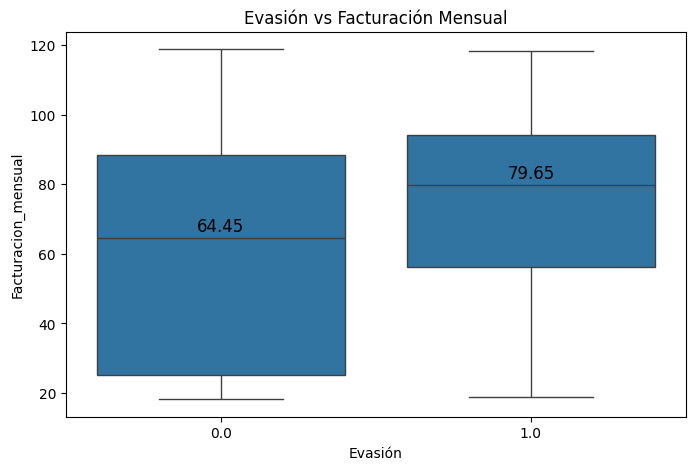

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot entre 'Evasión' y 'Facturación_mensual'
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='Evasión', y='Facturacion_mensual', data=df_normalized)

# Etiquetas para cada mediana
medianas = df_normalized.groupby('Evasión')['Facturacion_mensual'].median()
for i, median in enumerate(medianas):
    ax.text(i, median + 2, round(median, 2), horizontalalignment='center', size=12, color='black')

# Título del gráfico
plt.title('Evasión vs Facturación Mensual')

# Mostrar el gráfico
plt.show()


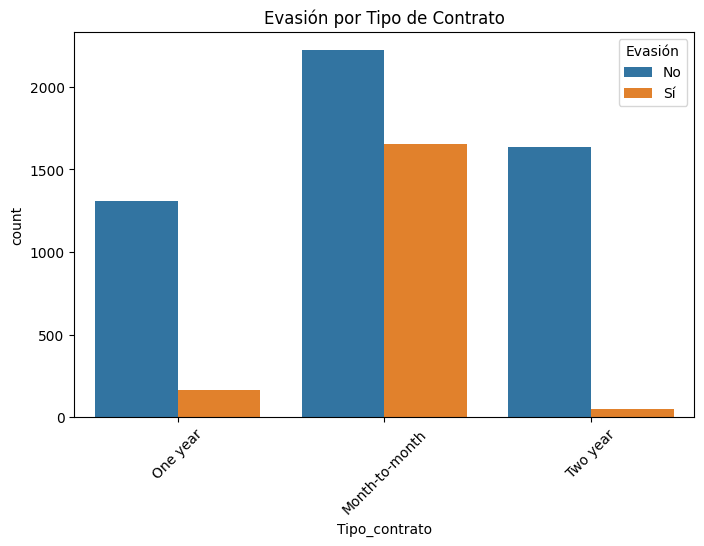

In [98]:

# Crear el gráfico de evasión por tipo de contrato
plt.figure(figsize=(8, 5))
sns.countplot(x='Tipo_contrato', hue='Evasión', data=df_normalized, hue_order=[0, 1])

# Modificar las etiquetas de la leyenda para que sean "No" y "Sí" en lugar de 0 y 1
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No', 'Sí']  # Cambiar las etiquetas de la leyenda
plt.legend(handles=handles, labels=labels, title='Evasión')

# Añadir título y rotar las etiquetas del eje X
plt.title('Evasión por Tipo de Contrato')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



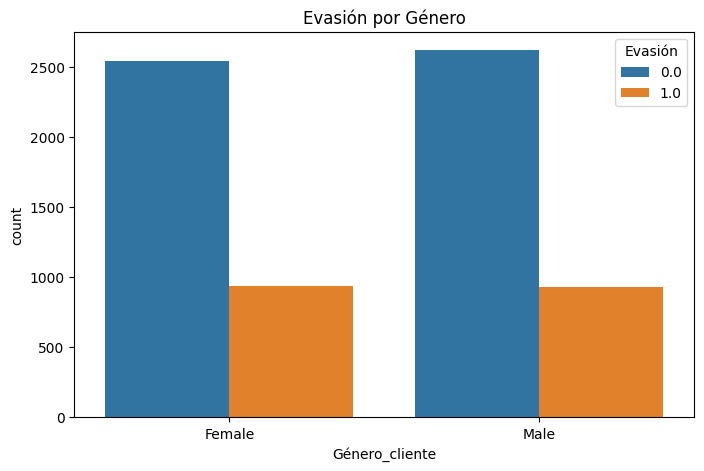

In [93]:
# Ver cómo se distribuye el churn según el género
plt.figure(figsize=(8, 5))
sns.countplot(x='Género_cliente', hue='Evasión', data=df_normalized)
plt.title('Evasión por Género')
plt.show()


/tmp/ipython-input-4003524644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evasión', data=df_normalized, palette='Set2')


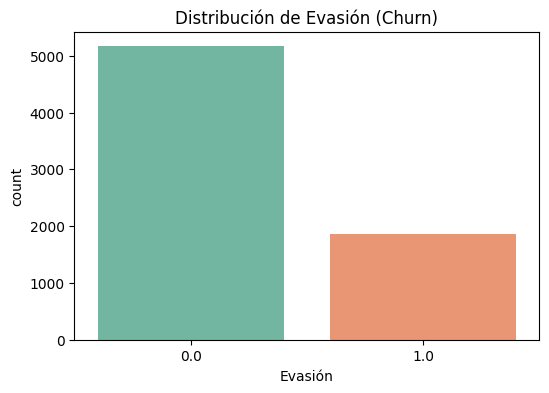

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la evasión (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Evasión', data=df_normalized, palette='Set2')
plt.title("Distribución de Evasión (Churn)")
plt.show()


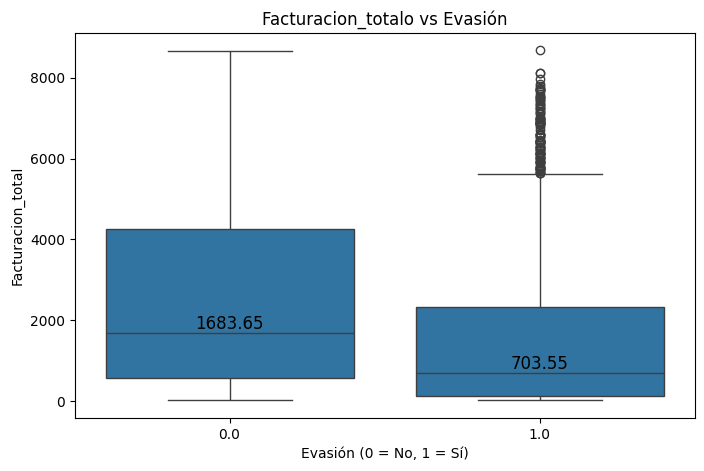

In [102]:
# Crear el gráfico de boxplot entre 'Evasión' y 'Facturacion_total'
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='Evasión', y='Facturacion_total', data=df_normalized)

# Título del gráfico
plt.title('Facturacion_totalo vs Evasión')

# Etiquetas para los ejes X y Y
plt.xlabel('Evasión (0 = No, 1 = Sí)')
plt.ylabel('Facturacion_total')

# Agregar mediana como etiqueta en el gráfico
medianas = df_normalized.groupby('Evasión')['Facturacion_total'].median()
for i, median in enumerate(medianas):
    ax.text(i, median + 100, round(median, 2), horizontalalignment='center', size=12, color='black')

# Mostrar el gráfico
plt.show()


#📄Informe final

# 📄 Informe Final

## Introducción

El objetivo de este análisis es comprender los factores que contribuyen a la **evasión de clientes (Churn)** en una empresa de telecomunicaciones. La evasión de clientes es un problema crítico que impacta directamente en los ingresos y el crecimiento de la empresa. Al identificar patrones y comportamientos de los clientes que tienden a evadir, podemos implementar estrategias proactivas para retenerlos.

## Limpieza y Tratamiento de Datos

Se realizó la extracción de los datos desde un archivo JSON alojado en GitHub y se normalizó la estructura para facilitar el análisis. Los pasos clave incluyeron:

- **Carga de datos:** Se cargó el archivo JSON en un DataFrame de pandas.
- **Normalización:** Se desanidaron las columnas anidadas ('customer', 'phone', 'internet', 'account') para obtener un DataFrame plano.
- **Verificación de nulos y duplicados:** Se verificó la presencia de valores nulos y duplicados. Se identificaron nulos en la columna 'account_Charges_Total' y se eliminaron las filas correspondientes. Se verificó la ausencia de duplicados.
- **Conversión de tipos de datos:** Se convirtieron las columnas de cargos a tipos numéricos.
- **Creación de nuevas columnas:** Se creó la columna 'Facturacion_diaria' dividiendo la 'Facturacion_mensual' por 30.
- **Mapeo de valores:** Se mapearon valores categóricos ('Yes', 'No', 'No internet service', 'No phone service') a valores numéricos (1 y 0) para su posterior análisis.
- **Limpieza de texto:** Se eliminaron espacios en blanco al inicio y final de las columnas de tipo objeto y se reemplazaron valores 'None' o 'NaN' por vacío.
- **Renombre de columnas:** Se renombraron las columnas a español para mayor claridad.
- **Reseteo de índice:** Se reseteó el índice del DataFrame.

## Análisis Exploratorio de Datos

Se realizaron análisis exploratorios para identificar patrones y relaciones en los datos. Los hallazgos clave incluyen:

- **Distribución de la evasión:** El gráfico de barras muestra la proporción de clientes que evadieron (Churn = 1) versus los que no (Churn = 0).
- **Evasión por tipo de contrato:** El gráfico de barras muestra que los clientes con contratos mes a mes tienen una mayor tasa de evasión en comparación con contratos a largo plazo.
- **Evasión por género:** El gráfico de barras muestra que no hay una diferencia significativa en la tasa de evasión entre hombres y mujeres.
- **Evasión vs Facturación Mensual:** El boxplot indica que los clientes que evaden tienden a tener facturas mensuales ligeramente más altas que los que no evaden.
- **Evasión vs Facturación Total:** El boxplot muestra que los clientes que evaden tienen una facturación total significativamente menor que los que no evaden, lo cual es esperado ya que han sido clientes por menos tiempo.

## Conclusiones e Insights

Basado en el análisis exploratorio, se identifican los siguientes insights clave:

- Los clientes con contratos a corto plazo (mes a mes) son más propensos a la evasión.
- La facturación mensual es ligeramente más alta para los clientes que evaden, mientras que la facturación total es significativamente menor.
- El género no parece ser un factor determinante en la evasión.
- Otros factores como servicios adicionales (seguridad online, soporte técnico, etc.) y el método de pago pueden influir en la evasión y requerir un análisis más profundo.

## Recomendaciones

Para reducir la evasión de clientes, se sugieren las siguientes estrategias:

- **Programas de fidelización:** Ofrecer incentivos a los clientes con contratos mes a mes para que cambien a contratos a más largo plazo.
- **Análisis de la facturación mensual:** Investigar por qué los clientes que evaden tienen facturas mensuales ligeramente más altas y si hay problemas con la percepción del valor.
- **Mejorar servicios adicionales:** Promocionar y mejorar los servicios de seguridad online, respaldo online, protección de dispositivo y soporte técnico, ya que pueden ser factores de retención.
- **Optimizar métodos de pago:** Analizar los métodos de pago preferidos por los clientes que no evaden y considerar la optimización de los métodos de pago para los clientes propensos a la evasión.
- **Análisis predictivo:** Implementar modelos de machine learning para predecir qué clientes tienen un alto riesgo de evasión y tomar medidas proactivas de retención.

Este informe proporciona una base para comprender la evasión de clientes. Se recomienda realizar análisis más profundos y segmentados para obtener insights más específicos y desarrollar estrategias de retención personalizadas.